In [3]:
using PyPlot,JLD2,Statistics,PyCall,StatsBase#,Seaborn

rc("font",family="sans-serif")
# using Pkg; Pkg.status()

In [120]:
using Printf
include("AMD_stability.jl")
##################################################
#
#     EXAMPLE -- SOLAR SYSTEM
#
##################################################
μ_real = [
	1.66e-7, 2.448e-6, 3e-6, 3.227e-7, # Terrestrial planets.
	9.546e-4, 2.858e-4, 4.366e-5, 5.151e-5 # Jovian planets.
]
a_real = [
	0.387098, 0.723332, 1.00, 1.523679,
	5.2044, 9.5826, 19.2184, 30.11
]
e_real = [
	0.205630, 0.006772, 0.0167086, 0.0934,
	0.0489, 0.0565, 0.046381, 0.009456
]
I_real = [ # Relative to the invariant plane.
	6.34, 2.19, 1.57869, 1.67,
	0.32, 0.93, 1.02, 0.72
] .* π/180
P_real= [87.969257175,224.70,365.25,686.98,4332.82,10755.5, 30687.153,60190.0296]

function report(name,stats,pairs)
	if all(stats .== :Stable)
		@info("$name: AMD stable.")
	else
		@info("$name: AMD unstable")
		for j in 1:length(stats)
			k = pairs[j]
			@info("    Pair ($(k-1),$k) -- $(stats[j])")
		end
	end
	println("")
end

#
# TEST 1
#
stats, pairs, ratios = AMD_stability(μ_real, a_real, e_real, I_real)
report("Solar System", stats, pairs)
#

┌ Info: Solar System: AMD unstable
└ @ Main In[120]:30
┌ Info:     Pair (0,1) -- Collision
└ @ Main In[120]:33
┌ Info:     Pair (1,2) -- Collision
└ @ Main In[120]:33
┌ Info:     Pair (2,3) -- Collision
└ @ Main In[120]:33
┌ Info:     Pair (3,4) -- Collision
└ @ Main In[120]:33
┌ Info:     Pair (4,5) -- Stable
└ @ Main In[120]:33
┌ Info:     Pair (5,6) -- Stable
└ @ Main In[120]:33
┌ Info:     Pair (6,7) -- Stable
└ @ Main In[120]:33
┌ Info:     Pair (7,8) -- Stable
└ @ Main In[120]:33


In [121]:
stats, pairs, ratios = AMD_stability(μ_real[1:4], a_real[1:4], e_real[1:4], I_real[1:4])
report("Inner Solar System", stats, pairs)

┌ Info: Inner Solar System: AMD stable.
└ @ Main In[120]:28


In [122]:
stats, pairs, ratios = AMD_stability(μ_real[5:end], a_real[5:end], e_real[5:end], I_real[5:end])
report("Outer Solar System", stats, pairs)

┌ Info: Outer Solar System: AMD stable.
└ @ Main In[120]:28


In [127]:
# Fake Mars
μ = [2.5452514806996778e-6,3.10658703046874e-6,8.582495339894613e-5,0.0007805546434104661]
P=[224.70077517395697, 365.2564552605551,1733.7614715994966, 4202.849483362612]
a = calc_sma.(P,μ)./CGS.AU
e = [calc_ecc(3.7336627654746756e-5,-0.0003712889341763076), calc_ecc(0.013146866967261101,0.00172740634375595), calc_ecc(0.26126214547436966,0.00860505790153028), calc_ecc(0.013493684234908196,-0.03727854443469793)]
I = [1.5707, 1.5707, 1.5707, 1.5707].* π/180 # assume all co-planar, edge-on orbits relative to the invariant plane.
stats, pairs, ratios = AMD_stability(μ, a, e, I)
report("Fake_Mars - System", stats, pairs)

┌ Info: Fake_Mars - System: AMD unstable
└ @ Main In[120]:30
┌ Info:     Pair (0,1) -- Collision
└ @ Main In[120]:33
┌ Info:     Pair (1,2) -- Collision
└ @ Main In[120]:33
┌ Info:     Pair (2,3) -- Stable
└ @ Main In[120]:33
┌ Info:     Pair (3,4) -- Stable
└ @ Main In[120]:33


In [129]:
# Fake Mars
μ = [2.5452514806996778e-6,3.10658703046874e-6,8.582495339894613e-5,0.0007805546434104661]
P=[224.70077517395697, 365.2564552605551,1733.7614715994966, 4202.849483362612]
a = calc_sma.(P,μ)./CGS.AU
e = [calc_ecc(3.7336627654746756e-5,-0.0003712889341763076), calc_ecc(0.013146866967261101,0.00172740634375595), calc_ecc(0.26126214547436966,0.00860505790153028), calc_ecc(0.013493684234908196,-0.03727854443469793)]
I = [0.0, 0.0, 0.0, 0.0].* π/180 # assume all co-planar, edge-on orbits relative to the invariant plane.
stats, pairs, ratios = AMD_stability(μ[1:2], a[1:2], e[1:2], I[1:2])
report("Fake_Mars - System", stats, pairs)

┌ Info: Fake_Mars - System: AMD stable.
└ @ Main In[120]:28


In [130]:
stats, pairs, ratios = AMD_stability(μ[1:2], a[1:2], e[1:2], I[1:2])
report("Fake_Mars - Inner System", stats, pairs)
stats, pairs, ratios = AMD_stability(μ[3:4], a[3:4], e[3:4], I[3:4])
report("Fake_Mars - Outer System", stats, pairs)

┌ Info: Fake_Mars - Inner System: AMD stable.
└ @ Main In[120]:28
┌ Info: Fake_Mars - Outer System: AMD stable.
└ @ Main In[120]:28


In [128]:
include("misc.jl")

# indepsamples=m["indepsamples"]

#     L"$μ_5$ [$M_{⋆}$]",L"$P_5$ [days]",L"$t_{0,5}$",L"$e_4 cos(ω_5)$",L"$e_5 sin(ω_5)$",
#     L"$t_{max} sin(ϕ_0)$",L"$t_{max} cos(ϕ_0)$",L"$Δϕ$ [rad]",L"$σ_{sys}^2$ [days]"]
truem1,truem2,truem3,truem4=0.815.*CGS.MEARTH/CGS.MSUN,1.0.*CGS.MEARTH/CGS.MSUN,0.1074.*CGS.MEARTH/CGS.MSUN,317.8.*CGS.MEARTH/CGS.MSUN
truep1,truep2,truep3,truep4=224.7007992,365.2564,686.9795859,4332.82012875
trueec1,trueec2,trueec3,trueec4=calc_evec1(0.00677323,131.53298),calc_evec1(0.01671022,102.94719),calc_evec1(0.09341233,336.04084),calc_evec1(0.04839266,14.75385)
truees1,truees2,truees3,truees4=calc_evec2(0.00677323,131.53298),calc_evec2(0.01671022,102.94719),calc_evec2(0.09341233,336.04084),calc_evec2(0.04839266,14.75385)
truee1,truee2,truee3,truee4=0.00677323,0.01671022,0.09341233,0.04839266

(0.00677323, 0.01671022, 0.09341233, 0.04839266)

In [333]:
## using JLD2
grid_type_nplanet="p3";sigma=30;nyear=22;
mcfile=string("MCMC/fromEMB/",grid_type_nplanet,"_mcmc",sigma,"s",nyear,"yrs.jld2")
m=jldopen(String(mcfile),"r")
par_mcmc= m["par_mcmc"];
lprob_mcmc=m["lprob_mcmc"];
nsteps=m["nsteps"]; iburn=m["iburn"];nwalkers=m["nwalkers"];
pname=m["pname"];
nsteps-iburn
parname=[L"$μ_1$",L"$P_1$ [days]",L"$t_{0,1}$",L"$e_1 cos(ω_1)$",L"$e_1 sin(ω_1)$",
    L"$μ_2$",L"$P_2$ [days]",L"$t_{0,2}$",L"$e_2 cos(ω_2)$",L"$e_2 sin(ω_2)$",
    L"$μ_4$",L"$P_4$ [days]",L"$t_{0,4}$",L"$e_4 cos(ω_4)$",L"$e_4 sin(ω_4)$",
    L"$μ_3$",L"$P_3$ [days]",L"$t_{0,3}$",L"$e_3 cos(ω_3)$",L"$e_3 sin(ω_3)$"]
# test_values=[ 
#     vec(par_mcmc[:,iburn:end,1]), 
#     vec(par_mcmc[:,iburn:end,2]),
#     vec(par_mcmc[:,iburn:end,4]), 
#     vec(par_mcmc[:,iburn:end,5]), 
#     vec(par_mcmc[:,iburn:end,6]), 
#     vec(par_mcmc[:,iburn:end,7]),
#     vec(par_mcmc[:,iburn:end,9]),
#     vec(par_mcmc[:,iburn:end,10]),
#     vec(par_mcmc[:,iburn:end,11]), 
#     vec(par_mcmc[:,iburn:end,12]),
#     vec(par_mcmc[:,iburn:end,14]), 
#     vec(par_mcmc[:,iburn:end,15]),
#     vec(par_mcmc[:,iburn:end,16]), 
#     vec(par_mcmc[:,iburn:end,17]),
#     vec(par_mcmc[:,iburn:end,19]), 
#     vec(par_mcmc[:,iburn:end,20])]
# # true_vals=[truem1;trueec1;truem2;trueec2;truem4;trueec4]#truem4;trueec4]#;truem4;truep4];
# labels=[parname[1];
#     parname[2];
#     parname[4];
#     parname[5];
#     parname[6];
#     parname[7];
#     parname[9];
#     parname[10];
#     parname[11];
#     parname[12];
#     parname[14];
#     parname[15];
#     parname[16];
#     parname[17];
#     parname[19];
#     parname[20]]
pname

# corner(test_values,labels,50;quantiles=[0.1587,0.8413])
# 0.8413-0.1587
# tight_layout()`
# savefig("IMAGES/discussion/widep4-30s30yrs_me.png")

16-element Vector{String}:
 "mu_1"
 "P_1"
 "t01"
 "e1 cos(om1)"
 "e1 sin(om1)"
 "mu_2"
 "P_2"
 "t02"
 "e2 cos(om2)"
 "e2 sin(om2)"
 "mu_3"
 "P_3"
 "t03"
 "e3 cos(om3)"
 "e3 sin(om3)"
 "σ_sys"

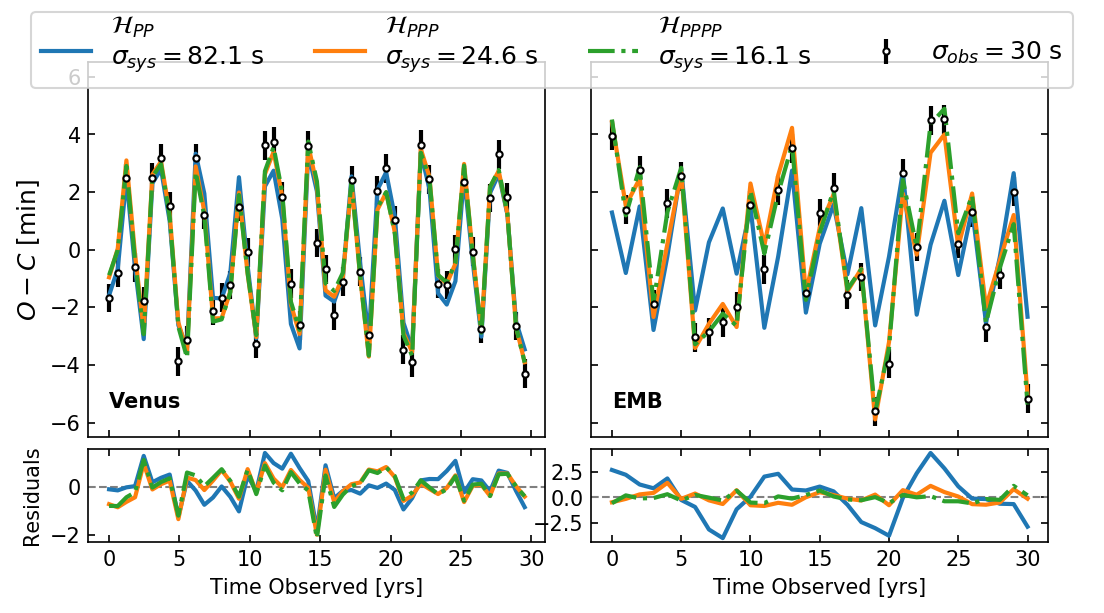

In [31]:
plot_res(30,30,["fromEMB","p4","best_p4"])

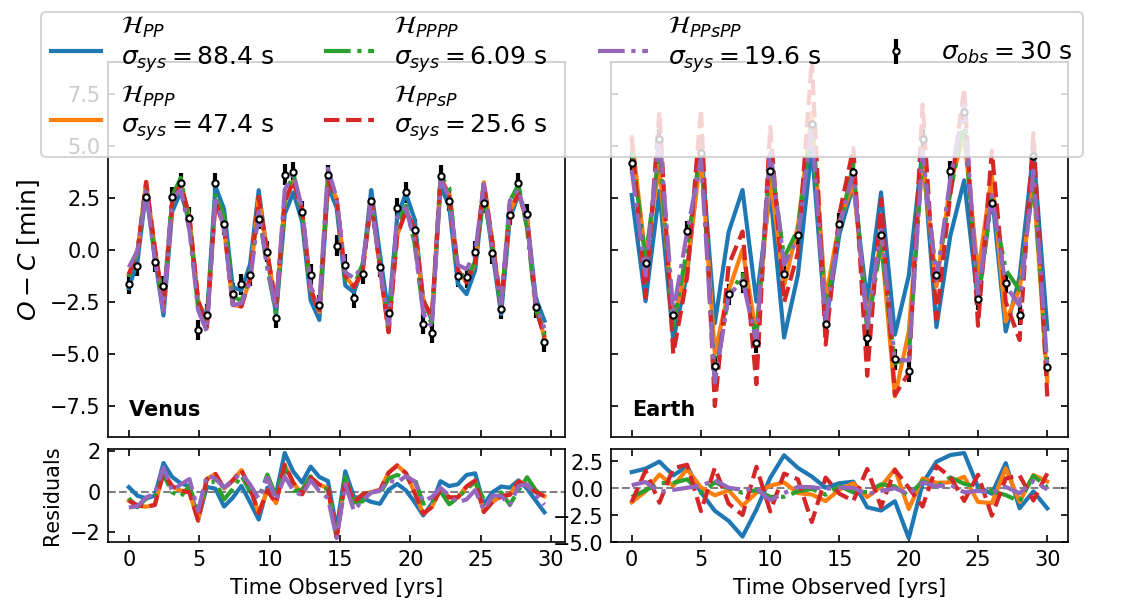

In [27]:
include("plot_ttvs.jl")
plot_res(30,30,["fromEV","p3moon","best_p4"],true)

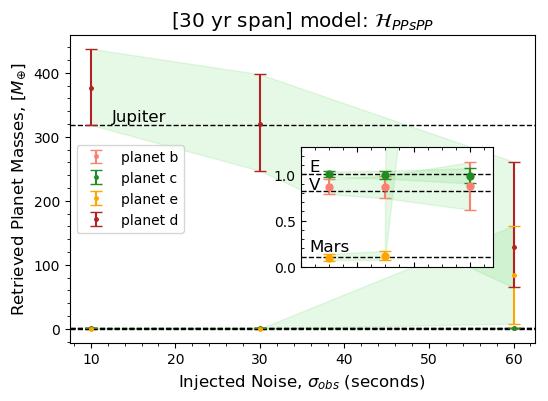

PyObject <matplotlib.legend.Legend object at 0x7fcb7127eb00>

In [37]:
labels=["planet b","planet c","planet e","planet d"]
planets=["Venus", "Earth","Mars","Jupiter"]
colors=["salmon","forestgreen","orange","firebrick"]
true_Mp=[0.815, 1, 317.8,0.1074]
   noise=[10, 30 ,60]
plot_noise(4,4,L"Retrieved Planet Masses, [$M_{\oplus}$]",
    medpm10,medpm30,medpm60,errpm10,errpm30,errpm60,L"$\mathcal{H}_{PPsPP}$","[30 yr span]")



In [ ]:
function plot_noise()
    true_Mp=[0.815, 1, 317.8, 0.1074]
#     noise=[10,30,60]
    nplanet=3
    fig=plt.figure(figsize=(6,4))
    ax1=gca()
    ax2=fig.add_axes([0.51,0.2,0.32,0.4])
    ax1.text(15,true_Mp[3]*1.05,string(planets[3]),fontsize="medium")
    ax2.text(15,true_Mp[1]*1.05,string(planets[1]),fontsize="medium")
    ax2.text(15,true_Mp[2]*1.05,string(planets[2]),fontsize="medium")
    for iplanet=1:nplanet
#     ax.text(15,true_val[iplanet]+0.01,string(planets[iplanet]),fontsize="medium")
    ax1.axhline(true_Mp[iplanet],linewidth=1.0,color="black",linestyle="--",label=planets[iplanet])
    ax1.errorbar(60,med60[iplanet*5-4].*CGS.MSUN/CGS.MEARTH,yerr=[err60[1,iplanet*5-4] err60[2,iplanet*5-4]]
            .*CGS.MSUN/CGS.MEARTH,fmt=".",color=colors[iplanet])
    ax1.errorbar(30,med30[iplanet*5-4].*CGS.MSUN/CGS.MEARTH,yerr=[err30[1,iplanet*5-4] err30[2,iplanet*5-4]]
            .*CGS.MSUN/CGS.MEARTH,fmt=".",color=colors[iplanet])
    ax1.errorbar(10,med10[iplanet*5-4].*CGS.MSUN/CGS.MEARTH,yerr=[err10[1,iplanet*5-4] err10[2,iplanet*5-4]]
            .*CGS.MSUN/CGS.MEARTH,fmt=".",color=colors[iplanet])
    
    ax2.axhline(true_Mp[iplanet],linewidth=1.0,color="black",linestyle="--",label=planets[iplanet])
    ax2.errorbar(60,med60[iplanet*5-4].*CGS.MSUN/CGS.MEARTH,yerr=[err60[1,iplanet*5-4] err60[2,iplanet*5-4]]
            .*CGS.MSUN/CGS.MEARTH,fmt=".",ms=10,color=colors[iplanet])
    ax2.errorbar(30,med30[iplanet*5-4].*CGS.MSUN/CGS.MEARTH,yerr=[err30[1,iplanet*5-4] err30[2,iplanet*5-4]]
            .*CGS.MSUN/CGS.MEARTH,fmt=".",ms=10,color=colors[iplanet])
    ax2.errorbar(10,med10[iplanet*5-4].*CGS.MSUN/CGS.MEARTH,yerr=[err10[1,iplanet*5-4] err10[2,iplanet*5-4]]
            .*CGS.MSUN/CGS.MEARTH,fmt=".",ms=10,color=colors[iplanet])
    end
        # #             scatter(noise[j],med[iplanet],color=colors[iplanet])
    #         end
# ax1.plot([10,30,60],[med10[11],med30[11],med60[11]].*CGS.MSUN/CGS.MEARTH)
ax2.set_ylim(0,1.3)
ax1.minorticks_on()
# ax2.tick_params(which="both",direction="in",right=true,top=true)
ax2.minorticks_on()
ax2.tick_params(which="both",direction="in",right=true,top=true)
model=L"$\mathcal{H}_{PPsP}$"
ax1.set_title(string("Parameters from [22 yr span], most preferred model: ",model))
ax1.set_ylabel(L"Retrieved Planet Masses, [$M_{\oplus}$]",fontsize="large")
ax1.set_xlabel(L"Injected Noise, $\sigma_{obs}$ (seconds)",fontsize="large")
# plt.legend()
# ax2.set_ylabel(L"$M_p$, [$M_{\oplus}$]",fontsize="large")
# ax2.set_xlabel(L"Injected Noise, $\sigma_{obs}$",fontsize="large")
end

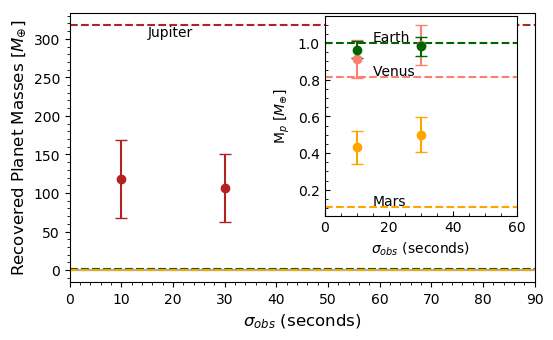

PyObject Text(0.5, 99.7611111111111, '$\\sigma_{obs}$ (seconds)')

In [259]:
fig=plt.figure(figsize=(6,3.5))
# plot_noise(true_Mp,Mp,Mp_err)
errorbar(noise[1],Mp[4,1],Mp_err[4,1],fmt="o",capsize=4,color=colors[4])
errorbar(noise[2],Mp[4,2],Mp_err[4,2],fmt="o",capsize=4,color=colors[4])
text(15,true_Mp[4]-15,string(planets[4]),fontsize="medium")
# axhline(true_Mp[4],linestyle="--",color=colors[4])
for iplanet=1:4
        axhline(true_Mp[iplanet],linestyle="--",color=colors[iplanet])
end
axhspan(0,1.2,color="grey",alpha=0.5)
xlim(0,90)
minorticks_on()
ylabel(L"Recovered Planet Masses [$M_{\oplus}$]",fontsize="large")
xlabel(L"$\sigma_{obs}$ (seconds)",fontsize="large")
ax2=fig.add_axes([0.55,0.3,0.32,0.57])
plot_noise(true_Mp,Mp,Mp_err)
ax2.set_xlim(0,60)
# ax2.set_ylim()
ax2.tick_params(which="both",direction="in",right=false,top=false)
minorticks_on()
ylabel(L"M$_p$ [$M_{\oplus}$]",fontsize="medium")
xlabel(L"$\sigma_{obs}$ (seconds)",fontsize="medium")

### Results

In [5]:

function span_vs_mass(fmt,less20::Bool=false)
    function plot_span(iplanet,color,fmt::String,less20::Bool)
        errorbar(30,M30yr[iplanet],M30yr_er[iplanet],fmt=fmt,color=color,capsize=4)
        errorbar(25,M25yr[iplanet],M25yr_er[iplanet],fmt=fmt,color=color,capsize=4)
        errorbar(20,M20yr[iplanet],M20yr_er[iplanet],fmt=fmt,color=color,capsize=4)
        if less20
            errorbar(15,M15yr[iplanet],M15yr_er[iplanet],fmt=fmt,color=color,capsize=4)
        end
        xlim(0,40)
        xlabel("Observation Time Span (yrs)")
        minorticks_on()
        
    end
end
function noise_vs_mass(fmt,g90::Bool=false)
    function plot_noise(iplanet,color,fmt::String,g90::Bool)
        axhline(vals[iplanet],linestyle="--",color="black")
        errorbar(10,M10sec[iplanet],M10sec_er[iplanet],fmt=fmt,color=color,capsize=4)
        errorbar(30,M30sec[iplanet],M30sec_er[iplanet],fmt=fmt,color=color,capsize=4)
        errorbar(60,M60sec[iplanet],M60sec_er[iplanet],fmt=fmt,color=color,capsize=4)
        if g90
            errorbar(90,M90sec[iplanet],M90sec_er[iplanet],fmt=fmt,color=color,capsize=4)
            errorbar(120,M120sec[iplanet],M120sec_er[iplanet],fmt=fmt,color=color,capsize=4)
            ylim(0,M120sec[iplanet]*2)
        end
        xlim(0,180)
        xlabel(L"$\sigma_{ij}$ (seconds)")
        minorticks_on()
        tick_params(which="both",direction="in",right="true",top="true")
    end
    fig=figure(figsize=(8,6))
    if length(M10sec) > 3
        ax1=subplot(141)
    else
        ax1=subplot(131)
    end
    axhline(vals[1],linestyle="--",color="black")
    plot_noise(1,"orange",fmt,g90)
    ax1.set_ylabel(L"Recovered Planet 1 Mass [$M_{Earth}$]")
    ax1.text(120,0.84,"Venus")
    ax1.set_ylim(0,1.8)
    if length(M10sec) > 3
        ax2=subplot(142)
    else
        ax2=subplot(132)
    end
    axhline(vals[2],linestyle="--",color="black")
    plot_noise(2,"green",fmt,g90)
    ax2.set_ylabel(L"Recovered Planet 2 Mass [$M_{Earth}$]")
    ax2.text(120,1.02,"Earth")
    ax2.set_ylim(0,1.2)
    if length(M10sec) > 3
        ax3=subplot(143)
        axhline(vals[4],linestyle="--",color="black")
        plot_noise(4,"firebrick",fmt,g90)
        ax3.set_ylabel(L"Recovered Planet 3 Mass [$M_{Earth}$]")
        ax3.text(120,300,"Jupiter")
        ax3.set_ylim(0,350)
        ax4=subplot(144)
        axhline(vals[3],linestyle="--",color="black")
        plot_noise(3,"darkcyan",fmt,g90)
        ax4.set_ylabel(L"Recovered Planet 4 Mass [$M_{Earth}$]")
        ax4.text(120,2,"Mars")
        ax4.set_ylim(0,50)
    else
        ax3=subplot(133)
        axhline(vals[4],linestyle="--",color="black")
        plot_noise(3,"firebrick",fmt,g90)
        ax3.set_ylabel(L"Recovered Planet 3 Mass [$M_{Earth}$]")
        ax3.text(120,300,"Jupiter")
        ax3.set_ylim(0,350)
    end
    tight_layout()
end

noise_vs_mass (generic function with 2 methods)

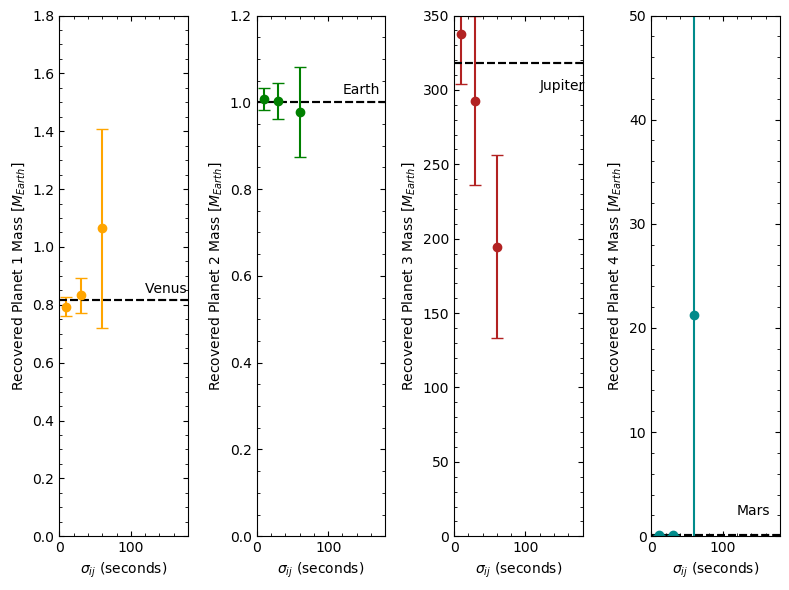

In [42]:
M10, M10_er = get_vals(10.0,30.0,"EMB","p4")
M30, M30_er = get_vals(30.0,30.0,"EMB","p4")
M60, M60_er = get_vals(60.0,30.0,"EMB","p4")
noise_vs_mass("o")

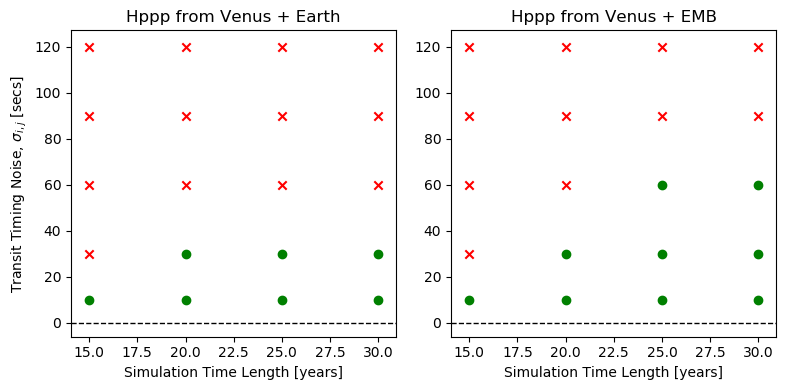

In [20]:
figure(figsize=(8,4)) 
# suptitle("Giant Planet Search Results")
ax1=subplot(121) # from no EMB
ax1.scatter(15,10,marker="o",color="green",label=L"$\geq3\sigma$ Detection")
# ax1.scatter(1+0.1,1,marker="o",color="green")
ax1.scatter(20,10,marker="o",color="green")
ax1.scatter(25,10,marker="o",color="green")
ax1.scatter(30,10,marker="o",color="green")
ax1.scatter(15,30,marker="x",color="red")#,label=L"$< 3\sigma$ Detection")
ax1.scatter(20,30,marker="o",color="green")
ax1.scatter(25,30,marker="o",color="green")
ax1.scatter(30,30,marker="o",color="green")
ax1.scatter(15,60,marker="x",color="red")
ax1.scatter(20,60,marker="x",color="red")
ax1.scatter(25,60,marker="x",color="red")
ax1.scatter(30,60,marker="x",color="red")
ax1.scatter(15,90,marker="x",color="red")#label="No detection/ not enough steps"
ax1.scatter(20,90,marker="x",color="red")
ax1.scatter(25,90,marker="x",color="red")
ax1.scatter(30,90,marker="x",color="red")
ax1.scatter(15,120,marker="x",color="red")
ax1.scatter(20,120,marker="x",color="red")
ax1.scatter(25,120,marker="x",color="red")
ax1.scatter(30,120,marker="x",color="red")
ax1.axhline(0,linestyle="--",color="black",linewidth=1)
ax1.set_ylabel(L"Transit Timing Noise, $σ_{i,j}$ [secs]")
ax1.set_xlabel("Simulation Time Length [years]")
# ax1.text(.5,5.5,"a)")
ax1.set_title("Hppp from Venus + Earth")
ax2=subplot(122)
ax2.scatter(15,10,marker="o",color="green",label=L"$\geq3\sigma$ EMB Detection")
ax2.scatter(20,10,marker="o",color="green")
ax2.scatter(25,10,marker="o",color="green")
ax2.scatter(30,10,marker="o",color="green")
ax2.scatter(15,30,marker="x",color="red")
ax2.scatter(20,30,marker="o",color="green")
ax2.scatter(25,30,marker="o",color="green")
ax2.scatter(30,30,marker="o",color="green")
ax2.scatter(15,60,marker="x",color="red")
ax2.scatter(20,60,marker="x",color="red")
ax2.scatter(25,60,marker="o",color="green")
ax2.scatter(30,60,marker="o",color="green")
ax2.scatter(15,90,marker="x",color="red")
ax2.scatter(20,90,marker="x",color="red")
ax2.scatter(25,90,marker="x",color="red")
ax2.scatter(30,90,marker="x",color="red")
ax2.scatter(15,120,marker="x",color="red")
ax2.scatter(20,120,marker="x",color="red")
ax2.scatter(25,120,marker="x",color="red")
ax2.scatter(30,120,marker="x",color="red")
ax2.axhline(0,linestyle="--",color="black",linewidth=1)
# ax1.scatter(1.25,5,marker="+",label="Additional",color="red")
# ax2.set_ylabel(L"Transit Timing Noise, $σ_{i,j}$ [secs]")
ax2.set_xlabel("Simulation Time Length [years]")
ax2.set_title("Hppp from Venus + EMB")
tight_layout()
show()
# make yaxis evenly spaced... dashed line at 0

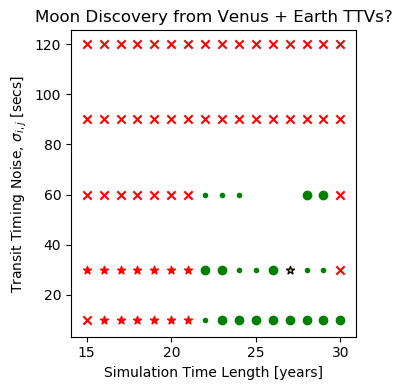

In [38]:
fig=figure(figsize=(4,4)) #Moon detections from EV times
ax3=gca()
# ax3.scatter(15,10,marker="o",color="green")#,label=L"$\geq3\sigma$ EMB Detection")
#### 120 secs
ax3.scatter(15,120,marker="x",color="red")
ax3.scatter(16,120,marker="x",color="red")
ax3.scatter(17,120,marker="x",color="red")
ax3.scatter(18,120,marker="x",color="red")
ax3.scatter(19,120,marker="x",color="red")
ax3.scatter(20,120,marker="x",color="red")
ax3.scatter(21,120,marker="x",color="red")
ax3.scatter(22,120,marker="x",color="red")
ax3.scatter(23,120,marker="x",color="red")
ax3.scatter(24,120,marker="x",color="red")
ax3.scatter(25,120,marker="x",color="red")
ax3.scatter(26,120,marker="x",color="red")
ax3.scatter(27,120,marker="x",color="red")
ax3.scatter(28,120,marker="x",color="red")
ax3.scatter(29,120,marker="x",color="red")
ax3.scatter(30,120,marker="x",color="red")
#### 90 secs
ax3.scatter(15,90,marker="x",color="red")
ax3.scatter(16,90,marker="x",color="red")
ax3.scatter(17,90,marker="x",color="red")
ax3.scatter(18,90,marker="x",color="red")
ax3.scatter(19,90,marker="x",color="red")
ax3.scatter(20,90,marker="x",color="red")
ax3.scatter(21,90,marker="x",color="red")
ax3.scatter(22,90,marker="x",color="red")
ax3.scatter(23,90,marker="x",color="red")
ax3.scatter(24,90,marker="x",color="red")
ax3.scatter(25,90,marker="x",color="red")
ax3.scatter(26,90,marker="x",color="red")
ax3.scatter(27,90,marker="x",color="red")
ax3.scatter(28,90,marker="x",color="red")
ax3.scatter(29,90,marker="x",color="red")
ax3.scatter(30,90,marker="x",color="red")
##### 60 secs
ax3.scatter(15,60,marker="x",color="red")
ax3.scatter(16,60,marker="x",color="red")
ax3.scatter(17,60,marker="x",color="red")
ax3.scatter(18,60,marker="x",color="red")
ax3.scatter(19,60,marker="x",color="red")
ax3.scatter(20,60,marker="x",color="red")
ax3.scatter(21,60,marker="x",color="red")
ax3.scatter(22,60,marker=".",color="green")
ax3.scatter(23,60,marker=".",color="green")
ax3.scatter(24,60,marker=".",color="green")
# ax3.scatter(25,60,marker="o",color="green")
# ax3.scatter(26,60,marker="o",color="green")
# ax3.scatter(27,60,marker="o",color="green")
ax3.scatter(28,60,marker="o",color="green")
ax3.scatter(29,60,marker="o",color="green")
ax3.scatter(30,60,marker="x",color="red")
#### 30 secs
ax3.scatter(15,30,marker="*",color="red")
ax3.scatter(16,30,marker="*",color="red")
ax3.scatter(17,30,marker="*",color="red")
ax3.scatter(18,30,marker="*",color="red")
ax3.scatter(19,30,marker="*",color="red")
ax3.scatter(20,30,marker="*",color="red")
ax3.scatter(21,30,marker="*",color="red")
ax3.scatter(22,30,marker="o",color="green")
ax3.scatter(23,30,marker="o",color="green")
ax3.scatter(24,30,marker=".",color="green")
ax3.scatter(25,30,marker=".",color="green")
ax3.scatter(26,30,marker="o",color="green")
ax3.scatter(27,30,marker="*",color="yellow",edgecolor="black")
ax3.scatter(28,30,marker=".",color="green")
ax3.scatter(29,30,marker=".",color="green")
ax3.scatter(30,30,marker="*",color="red")
###### 10 secs
ax3.scatter(15,10,marker="x",color="red")
ax3.scatter(16,10,marker="*",color="red")
ax3.scatter(17,10,marker="*",color="red")
ax3.scatter(18,10,marker="*",color="red")
ax3.scatter(19,10,marker="*",color="red")
ax3.scatter(20,10,marker="*",color="red")
ax3.scatter(21,10,marker="*",color="red")
ax3.scatter(22,10,marker=".",color="green")
ax3.scatter(23,10,marker="o",color="green")
ax3.scatter(24,10,marker="o",color="green")
ax3.scatter(25,10,marker="o",color="green")
ax3.scatter(26,10,marker="o",color="green")
ax3.scatter(27,10,marker="o",color="green")
ax3.scatter(28,10,marker="o",color="green")
ax3.scatter(29,10,marker="o",color="green")
ax3.scatter(30,10,marker="o",color="green")

# ax3.axhline(0,linestyle="--",color="black",linewidth=1)
# ax1.scatter(1.25,5,marker="+",label="Additional",color="red")
ax3.set_xlabel("Simulation Time Length [years]")
ax3.set_ylabel(L"Transit Timing Noise, $σ_{i,j}$ [secs]")
# ax2.text(.5,5.5,"b)")
ax3.set_title("Moon Discovery from Venus + Earth TTVs?")
tight_layout()
show()
# * - 
# o - p3m best
# . - p4m best

In [ ]:
figure(figsize=(8,4)) 
title("Terrestrial Planet Search Results")
ax1=subplot(121) # from no EMB
ax1.scatter(1,1,marker="o",color="green",label=L"$\geq3\sigma$ Detection")
# ax1.scatter(1+0.1,1,marker="o",color="green")
ax1.scatter(2,1,marker="o",color="green")
ax1.scatter(3,1,marker="o",color="green")
ax1.scatter(4,1,marker="o",color="green")
ax1.scatter(1,2,marker="o",color="green")#,label=L"$< 3\sigma$ Detection")
ax1.scatter(2,2,marker="o",color="green")
ax1.scatter(3,2,marker="o",color="green")
ax1.scatter(4,2,marker="o",color="green")
ax1.scatter(1,3,marker="o",color="green")
ax1.scatter(2,3,marker="o",color="green")
ax1.scatter(3,3,marker="o",color="green")
ax1.scatter(4,3,marker="x",color="red")
ax1.scatter(1,4,marker="x",color="red")#label="No detection/ not enough steps"
ax1.scatter(2,4,marker="x",color="red")
ax1.scatter(3,4,marker="x",color="red")
ax1.scatter(4,4,marker="x",color="red")
ax1.scatter(1,5,marker="x",color="red")
ax1.scatter(2,5,marker="x",color="red")
ax1.scatter(3,5,marker="x",color="red")
ax1.scatter(4,5,marker="x",color="red")
ax1.axhline(0,linestyle="--",color="black",linewidth=1)
ax1.set_xlabel("Simulation Time Length [years]")
ax1.set_ylabel(L"Transit Timing Noise, $σ_{i,j}$ [secs]")
ax1.set_title("Hpppp from Venus + Earth")
ax2=subplot(122)
ax2.scatter(1,1,marker="o",color="green",label=L"$\geq3\sigma$ EMB Detection")
ax2.scatter(2,1,marker="o",color="green")
ax2.scatter(3,1,marker="o",color="green")
ax2.scatter(4,1,marker="o",color="green")
ax2.scatter(1,2,marker="o",color="green")#,label=L"$< 3\sigma$ Detection")
ax2.scatter(2,2,marker="o",color="green")
ax2.scatter(3,2,marker="o",color="green")
ax2.scatter(4,2,marker="o",color="green")
ax2.scatter(1,3,marker="o",color="green")
ax2.scatter(2,3,marker="x",color="red")
ax2.scatter(3,3,marker="o",color="green")
ax2.scatter(4,3,marker="x",color="red")
ax2.scatter(1,4,marker="x",color="red")#label="No detection/ not enough steps"
ax2.scatter(2,4,marker="x",color="red")
ax2.scatter(3,4,marker="x",color="red")
ax2.scatter(4,4,marker="x",color="red")
ax2.scatter(1,5,marker="x",color="red")
ax2.scatter(2,5,marker="x",color="red")
ax2.scatter(3,5,marker="x",color="red")
ax2.scatter(4,5,marker="x",color="red")
ax2.axhline(0,linestyle="--",color="black",linewidth=1)
ax2.set_xlabel("Simulation Time Length [years]")
ax2.set_ylabel(L"Transit Timing Noise, $σ_{i,j}$ [secs]")
ax2.set_title("Hppp from Venus + EMB")
# ax1.legend()
tight_layout()
show()

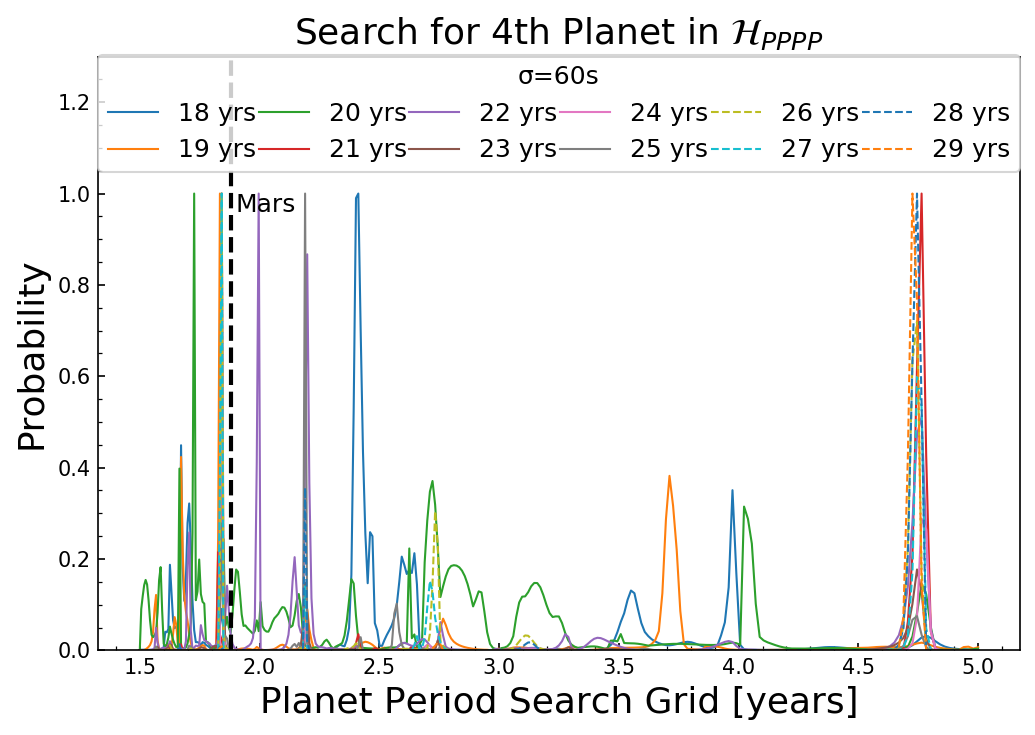

In [135]:
include("plot_likelihood.jl")
compare_yrs(60,"widep4",2)

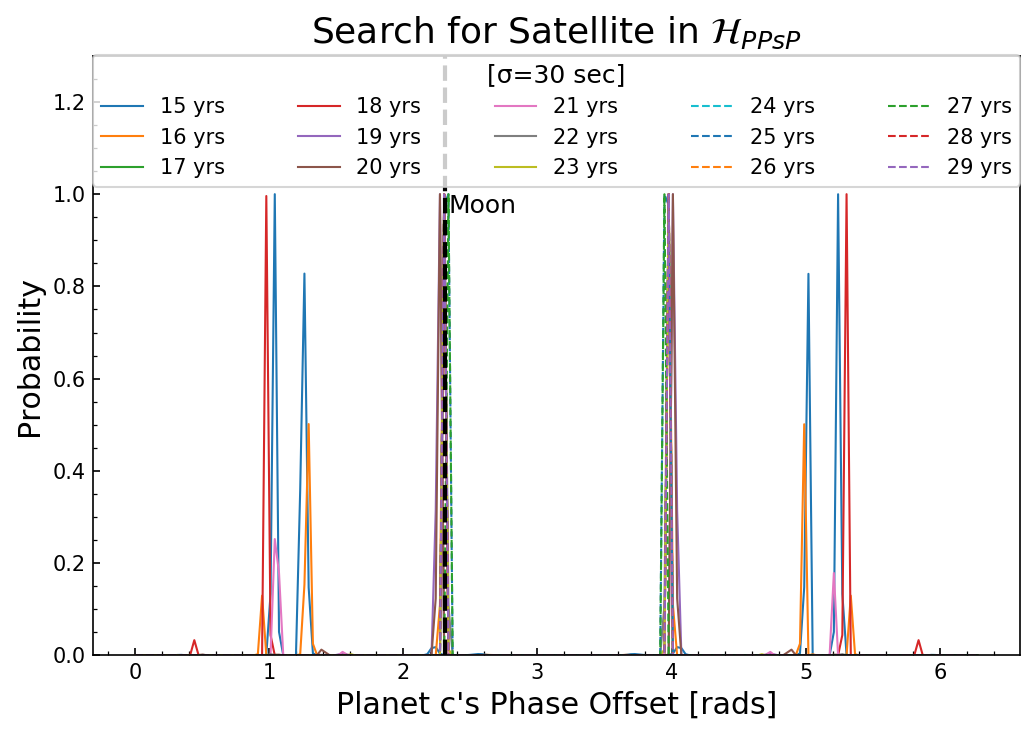

In [10]:
include("plot_likelihood.jl")
moon_yrs(30,"widep3moon",18, 2.312, "Moon",2)

In [41]:
# include("corner_plot.jl");corner_plot(60,30,"widep3moonp4",2,75,true)
# #corner_plot(60,22,"p3",2,75)

Burn-in number: 40000 out of 40000 steps
BIC= -984.0	 reduced χ^2: 1.789


In [13]:
corner_plot(10,22,"p4",2,75)

# of independent samples: 608.7815944459264
Burn-in number: 25097 out of 40000 steps
BIC= -559.5	 reduced χ^2: 1.35


### Linear Fit to Posterior mean and/or std

 14.543641 seconds (7.01 M allocations: 1.762 GiB, 5.00% gc time, 60.94% compilation time)


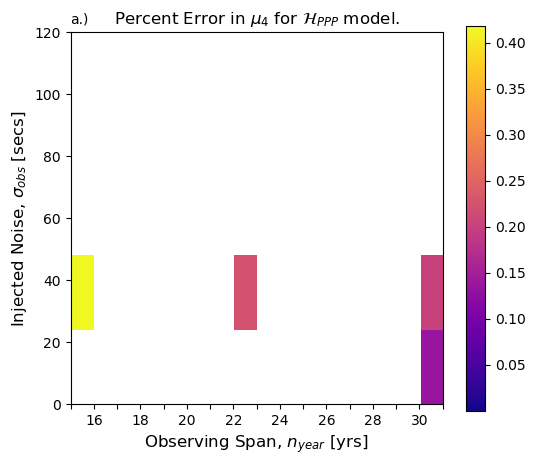

(PyCall.PyObject[PyObject <matplotlib.axis.XTick object at 0x7f899c67f400>, PyObject <matplotlib.axis.XTick object at 0x7f899cf1db70>, PyObject <matplotlib.axis.XTick object at 0x7f899cf1d828>, PyObject <matplotlib.axis.XTick object at 0x7f8952a1d3c8>, PyObject <matplotlib.axis.XTick object at 0x7f8952a1d898>, PyObject <matplotlib.axis.XTick object at 0x7f8952a1dd68>, PyObject <matplotlib.axis.XTick object at 0x7f8952a25278>, PyObject <matplotlib.axis.XTick object at 0x7f8952a25748>, PyObject <matplotlib.axis.XTick object at 0x7f8952a25c18>, PyObject <matplotlib.axis.XTick object at 0x7f8952a2d198>, PyObject <matplotlib.axis.XTick object at 0x7f8952a2d668>, PyObject <matplotlib.axis.XTick object at 0x7f8952a25a90>, PyObject <matplotlib.axis.XTick object at 0x7f8952a1d4a8>, PyObject <matplotlib.axis.XTick object at 0x7f8952a2db00>, PyObject <matplotlib.axis.XTick object at 0x7f8952a360b8>, PyObject <matplotlib.axis.XTick object at 0x7f8952a36550>, PyObject <matplotlib.axis.XTick object 

In [1]:
using JLD2,Statistics,PyPlot,LaTeXStrings
function plot_param(param_col,grid_type_nplanet;obs::String="fromEMB")
    sigmas=[10,30,60,90,120]
    years=[15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
    data=[];errors=[]
    parname=[L"$μ_1$",L"$P_1$ [days]",L"$t_{0,1}$",L"$e_1 cos(ω_1)$",L"$e_1 sin(ω_1)$",
    L"$μ_2$",L"$P_2$ [days]",L"$t_{0,2}$",L"$e_2 cos(ω_2)$",L"$e_2 sin(ω_2)$",
    L"$μ_4$",L"$P_4$ [days]",L"$t_{0,4}$",L"$e_4 cos(ω_4)$",L"$e_4 sin(ω_4)$",
    L"$μ_3$",L"$P_3$ [days]",L"$t_{0,3}$",L"$e_3 cos(ω_3)$",L"$e_3 sin(ω_3)$"]
    if grid_type_nplanet=="p2" 
    model=L"$\mathcal{H}_{PP}$"
    elseif grid_type_nplanet=="p3" || grid_type_nplanet=="widep3"
    model=L"$\mathcal{H}_{PPP}$"
    elseif grid_type_nplanet=="p4" || grid_type_nplanet=="widep4"
    model=L"$\mathcal{H}_{PPPP}$"
    end
    sigs,yrs=[],[];empty_name=[]
    errors_2d=zeros(length(sigmas),length(years)).* NaN 
    for (i,sigma) in enumerate(sigmas)
       for (j,nyear) in enumerate(years)
           mcfile=string("MCMC/fromEMB/",grid_type_nplanet,"_mcmc",sigma,"s",nyear,"yrs.jld2")
           if isfile(mcfile)
           mc=jldopen(mcfile,"r")
           pname=mc["pname"]
           med=median(mc["par_mcmc"][:,mc["iburn"]:end,param_col])#,sigdigits=6)
           low=quantile(vec(mc["par_mcmc"][:,mc["iburn"]:end,param_col]),0.1587)
           high=quantile(vec(mc["par_mcmc"][:,mc["iburn"]:end,param_col]),0.8413)
           st_dev = std(mc["par_mcmc"][:,mc["iburn"]:end,param_col])
           err_ratio=(st_dev)/med
    #                println(sigma," secs ",nyear," yr span; ",String(pname[param_col])," median=",med)
            push!(empty_name,parname[param_col])
            push!(data,med)
            push!(errors,err_ratio)
            push!(sigs,sigma)
            push!(yrs,nyear)
            errors_2d[i,j]=err_ratio
           end
       end
    end
    fig,ax=plt.subplots(figsize=(6,5))
#     h,xedges,yedges,im=ax.hist2d(yrs,sigs,weights=errors,bins=[length(years),length(sigmas)],cmin=0.00001,cmap="plasma")#,edgecolors="black")
    im=ax.imshow(errors_2d,aspect=1,origin="lower",cmap="plasma",vmin=0.0001,extent=[0.0,120,0.0,120])
#     minorticks_on()

    colorbar(im)
    plt.title(string("Percent Error in ",empty_name[1]," for ",model," model."))
#     yticks(collect(range(0.0,length=length(years)+1,stop=1.0)),
#         ["0.0","10","17","18","19","20","21","22","23","24","25","26","27","28","29","30"])
    ax.set_xlabel(string("Observing Span, ",L"$n_{year}$ [yrs]"),fontsize="large")
    ax.set_ylabel(string("Injected Noise, ",L"$\sigma_{obs}$ [secs]"),fontsize="large")
    ax.text(-0.05,123,"a.)")
    xticks(collect(range(0.0,length=length(years)+1,stop=120)),["","16","","18","","20","","22","","24","","26","","28","","30"])

    end

@time plot_param(11,"p3")
# f,g=plot_param(6)

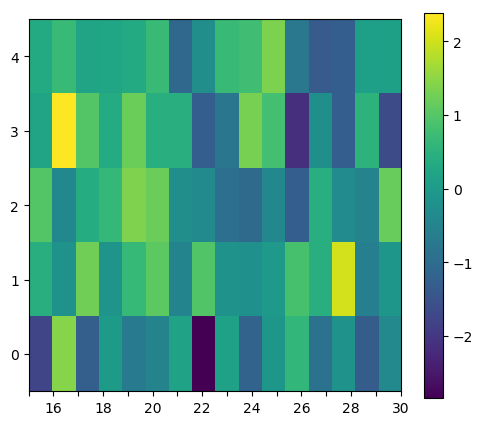

PyObject <matplotlib.colorbar.Colorbar object at 0x7fdae425aa90>

In [38]:
using PyPlot
N=10
 fig,ax=plt.subplots(figsize=(6,5))
# imshow(zeros(2,2))
im=ax.imshow(randn(5,16),extent=[-0.5,4.5,-0.5,4.5])
xticks(collect(range(-0.5,length=16,stop=4.5)),["","16","","18","","20","","22","","24","","26","","28","","30"])
colorbar(im)
# imshow([1 1])

In [ ]:
println("hellow")